In [4]:
from __future__ import print_function
from matplotlib import pyplot as plt
import pandas as pd
import requests
import csv
import sys
import numpy as np

from scipy.constants import speed_of_light
from scipy.constants import epsilon_0
from scipy.constants import Planck
from scipy.constants import Boltzmann
h = Planck
kB = Boltzmann
e0 = epsilon_0
c = speed_of_light

### Fit Raw DFT data with chosen scaling factor and fwhm

#### For calculate Raman Intensity 
- Incident wavenumber = 785 cm-1
- Temperature T = 300 K

In [147]:
# Incident frequency in nm used in DFT calculation
v0 = 785
def Raman_intensity(v0, frequencies,intensities,number_peaks):
    Raman = []
    for i in range(number_peaks):
        Raman.append(Intensity(v0, frequencies[i], intensities[i]))
    return Raman

#Input to function: Incident light and normal mode wavenumber, Raman scattering activity
def Intensity(v0, vi, Si):
    T = 300
    difv = (10**7/v0-vi)**4
    B = (1-np.exp(-(h*c*vi)/(kB*T)))
    constant = h/(e0**2*c)
    Int = constant*(difv/B)*(Si/vi)
    return Int

#For broadened IR spectrum
fwhm = 24
gamma=fwhm/2

def broad_y(intensity,frequency,number_peaks):
    sum_y = 0
    for i in range(number_peaks):
        y = intensity[i]
        fx = (1 / (gamma*np.pi))  * (gamma**2/((x-frequency[i])**2+gamma**2))
        sum_y += y*fx
    return sum_y

# For normalize spectrum with respect to the area under the curve and minmax scale to range 0 - 1
def scaler(x, y):
    area = np.trapz(y,x)
    y_normalized = y/area
    
    ymin = min(y_normalized)
    ymax = max(y_normalized)
    y_scaled = (y_normalized - ymin) / (ymax - ymin)
    
    return y_scaled  

#### Check if all required inputs files are ready

In [5]:
path =  "/Users/hek/Research/Cheminformatics/Project_3_ML for Raman data/Compounds_PubChem 3D/"
df_label = pd.read_csv(path+"NPS compounds dataset.csv")
compound = df_label['Name']
conformers = df_label['Conformers']
index = df_label.index
Class = df_label.Class

In [151]:
def precheck_files(data):   
    for i in range(len(compound)-1):
        print("Name of durg:",compound[i])
        print("Number of conformers:",conformers[i])
        for n_con in range(conformers[i]):
            print(n_con)
            filename = path+compound[i]+'/'+compound[i]+'_'+str(n_con)+" unscaled DFT 6311++G(d,p) "+data+".csv"
            #print(filename)
            file = pd.read_csv(filename)
        
            print("Number of normal modes:",file.shape[0])
            print(file.head(2))

In [152]:
precheck_files('IR')
#precheck_files('Raman')

Name of durg: Heroin
Number of conformers: 9
0
Number of normal modes: 144
   frequencies  intensities
0      15.5318       0.1219
1      30.0063       0.7011
1
Number of normal modes: 144
   frequencies  intensities
0      23.4639       0.4270
1      37.1812       0.6678
2
Number of normal modes: 144
   frequencies  intensities
0      22.9060       0.6424
1      37.3618       0.7262
3
Number of normal modes: 144
   frequencies  intensities
0      23.0807       0.0943
1      31.8331       0.8415
4
Number of normal modes: 144
   frequencies  intensities
0      15.1970       0.7188
1      30.5009       0.7764
5
Number of normal modes: 144
   frequencies  intensities
0      12.2071       0.3124
1      31.5810       0.2088
6
Number of normal modes: 144
   frequencies  intensities
0      23.9498       1.0765
1      36.4586       0.6782
7
Number of normal modes: 144
   frequencies  intensities
0      17.9847       0.7577
1      30.3348       0.8768
8
Number of normal modes: 144
   frequencie

1      41.9827       0.2694
6
Number of normal modes: 102
   frequencies  intensities
0      37.9757       0.0839
1      42.0138       0.2002
7
Number of normal modes: 102
   frequencies  intensities
0      20.8309       1.9333
1      37.8520       0.2134
8
Number of normal modes: 102
   frequencies  intensities
0      16.7769       1.8417
1      32.3702       0.0994
Name of durg: IPH
Number of conformers: 10
0
Number of normal modes: 120
   frequencies  intensities
0      19.0369       0.8097
1      39.6570       0.0550
1
Number of normal modes: 120
   frequencies  intensities
0      26.7503       0.3723
1      35.3415       0.0848
2
Number of normal modes: 120
   frequencies  intensities
0      19.0627       0.7843
1      39.2984       0.1070
3
Number of normal modes: 120
   frequencies  intensities
0       7.1695       0.6421
1      37.6818       0.1505
4
Number of normal modes: 120
   frequencies  intensities
0      13.2365       0.7382
1      32.5578       0.1105
5
Number of norma

1      57.7715       1.2348
5
Number of normal modes: 75
   frequencies  intensities
0      22.0922       0.2021
1      58.0790       0.6915
6
Number of normal modes: 75
   frequencies  intensities
0      39.3470       2.3708
1      52.0441       1.0583
7
Number of normal modes: 75
   frequencies  intensities
0      27.3963       0.1883
1      49.4685       0.0388
Name of durg: 4-FA
Number of conformers: 6
0
Number of normal modes: 63
   frequencies  intensities
0      44.9593       0.5484
1      66.7953       0.4095
1
Number of normal modes: 63
   frequencies  intensities
0      43.4504       0.3202
1      65.0413       0.2116
2
Number of normal modes: 63
   frequencies  intensities
0      43.2449       0.6318
1      63.0416       0.4211
3
Number of normal modes: 63
   frequencies  intensities
0      43.6697       0.2873
1      64.4380       0.2202
4
Number of normal modes: 63
   frequencies  intensities
0      47.5535       0.0426
1      75.2653       0.3588
5
Number of normal modes:

Number of normal modes: 87
   frequencies  intensities
0      24.5571       2.2546
1      50.8471       0.5318
2
Number of normal modes: 87
   frequencies  intensities
0      29.5384       2.2970
1      31.2546       0.6449
3
Number of normal modes: 87
   frequencies  intensities
0      25.3699       1.9274
1      49.2819       0.6458
4
Number of normal modes: 87
   frequencies  intensities
0      27.4182       2.0141
1      44.9728       0.0567
Name of durg: 2,4-DMMC
Number of conformers: 10
0
Number of normal modes: 87
   frequencies  intensities
0      23.6927       0.2732
1      30.5031       1.9732
1
Number of normal modes: 87
   frequencies  intensities
0      29.0343       1.4070
1      32.3282       1.2141
2
Number of normal modes: 87
   frequencies  intensities
0      24.7887       0.1785
1      27.3971       0.5897
3
Number of normal modes: 87
   frequencies  intensities
0      26.6692       0.2699
1      28.6116       2.1550
4
Number of normal modes: 87
   frequencies  inten

Number of normal modes: 90
   frequencies  intensities
0      29.7291       0.3515
1      36.1515       0.1201
2
Number of normal modes: 90
   frequencies  intensities
0      17.8482       0.0654
1      40.6308       0.3752
3
Number of normal modes: 90
   frequencies  intensities
0      20.5392       0.0768
1      40.1078       0.3500
4
Number of normal modes: 90
   frequencies  intensities
0      24.9902       0.1634
1      34.2455       0.0951
5
Number of normal modes: 90
   frequencies  intensities
0      27.9145       0.0363
1      41.1379       0.0838
6
Number of normal modes: 90
   frequencies  intensities
0      14.5643       0.0686
1      47.6374       0.1236
7
Number of normal modes: 90
   frequencies  intensities
0      24.6571       0.0960
1      45.7994       0.7885
Name of durg: MBDB
Number of conformers: 8
0
Number of normal modes: 90
   frequencies  intensities
0      29.8957       0.1016
1      44.3540       0.0914
1
Number of normal modes: 90
   frequencies  intensitie

1      40.5471       0.2435
Name of durg: Nordazepam
Number of conformers: 1
0
Number of normal modes: 84
   frequencies  intensities
0      43.1019       0.6624
1      54.9029       0.2730
Name of durg: Fludiazepam
Number of conformers: 2
0
Number of normal modes: 93
   frequencies  intensities
0      34.9508       1.0143
1      44.3746       0.7462
1
Number of normal modes: 93
   frequencies  intensities
0      28.5137       0.1591
1      42.6314       0.9792
Name of durg: THC
Number of conformers: 10
0
Number of normal modes: 153
   frequencies  intensities
0      14.7158       0.0081
1      26.1951       0.2587
1
Number of normal modes: 153
   frequencies  intensities
0      14.2518       0.0114
1      24.0611       0.1098
2
Number of normal modes: 153
   frequencies  intensities
0      15.1512       0.0121
1      22.7489       0.1131
3
Number of normal modes: 153
   frequencies  intensities
0      16.3220       0.0309
1      24.8362       0.2343
4
Number of normal modes: 153
   fr

Number of normal modes: 129
   frequencies  intensities
0      12.8690       0.1744
1      17.4946       0.0077
4
Number of normal modes: 129
   frequencies  intensities
0      13.1389       0.0963
1      15.4000       0.0674
5
Number of normal modes: 129
   frequencies  intensities
0       9.3324       0.0671
1      15.5936       0.0411
6
Number of normal modes: 129
   frequencies  intensities
0      11.6012       0.1798
1      19.0794       0.4275
7
Number of normal modes: 129
   frequencies  intensities
0      12.3337       0.0053
1      15.2263       0.1691
8
Number of normal modes: 129
   frequencies  intensities
0      10.8635       0.1716
1      18.4110       0.0500
9
Number of normal modes: 129
   frequencies  intensities
0      12.9898       0.0374
1      19.5207       0.2403
Name of durg: NBOMe-2C-N
Number of conformers: 10
0
Number of normal modes: 135
   frequencies  intensities
0      11.4715       0.2365
1      15.4073       0.2581
1
Number of normal modes: 135
   frequen

1      43.5009       0.3618
4
Number of normal modes: 99
   frequencies  intensities
0      29.1104       1.1506
1      36.4039       0.4823
5
Number of normal modes: 99
   frequencies  intensities
0      26.6058       0.6100
1      37.5742       1.0038
6
Number of normal modes: 99
   frequencies  intensities
0      36.2911       0.7119
1      39.2722       0.3299
7
Number of normal modes: 99
   frequencies  intensities
0       25.442       0.4597
1       39.482       2.1581
8
Number of normal modes: 99
   frequencies  intensities
0      22.5054       0.5755
1      38.7788       0.3433
Name of durg: 2C-T
Number of conformers: 9
0
Number of normal modes: 90
   frequencies  intensities
0      43.5057       1.2213
1      48.1105       1.1629
1
Number of normal modes: 90
   frequencies  intensities
0      42.4100       0.6520
1      46.9502       1.3905
2
Number of normal modes: 90
   frequencies  intensities
0      39.0805       0.1507
1      46.5867       0.6035
3
Number of normal modes:

Number of normal modes: 132
   frequencies  intensities
0      10.5568       0.0326
1      17.5607       0.0278
6
Number of normal modes: 132
   frequencies  intensities
0      11.9070       0.2258
1      13.6564       0.8209
7
Number of normal modes: 132
   frequencies  intensities
0      12.0032       0.1419
1      16.3924       0.1012
8
Number of normal modes: 132
   frequencies  intensities
0      14.7229       0.2969
1      21.4404       0.2365
9
Number of normal modes: 132
   frequencies  intensities
0      12.9333       0.2219
1      18.1935       0.2654
Name of durg: Psilocin
Number of conformers: 5
0
Number of normal modes: 87
   frequencies  intensities
0      46.6792       1.5437
1      66.0918       0.2478
1
Number of normal modes: 87
   frequencies  intensities
0      34.3014       0.4856
1      45.0264       0.6945
2
Number of normal modes: 87
   frequencies  intensities
0      27.6371       0.1864
1      39.7937       0.0441
3
Number of normal modes: 87
   frequencies  i

## Make scaled spectra dataset
### IR
400 - 4000 cm-1, in 2 cm-1 increment

In [153]:
x_start = 400
x_stop = 4000
# Create x values
x = np.linspace(x_start,x_stop,1801)
print(len(x))

count = 400
feature = []
for i in range(1801):
    #print(count)
    feature.append(int(count))
    count += int(2)
print(len(feature))

1801
1801


In [157]:
def fit_IR_data(scaling_factor):   
    for i in range(len(compound)-1):
        print("Drug:",compound[i], "Number of conformers:",conformers[i])
        for n_con in range(conformers[i]):
            print(n_con)
            filename = path+compound[i]+'/'+compound[i]+'_'+str(n_con)+" unscaled DFT 6311++G(d,p) IR.csv"
            file = pd.read_csv(filename)
            #print(file.head(2))
            number_peaks = file.shape[0]
            scaled_frequency = file.frequencies*scaling_factor
            #print("Scaled frequencies:",scaled_frequency[0:2])
            intensity=file.intensities
            #print("Intensities:",intensity[0:2])
            
            #Fit by broad_y()
            y = broad_y(intensity,scaled_frequency,number_peaks)
            scaled_y = scaler(x,y)
            #print("Max normalized intensity:",max(scaled_y))
            #print("Min normalized intensity:",min(scaled_y))
            #print("Dimension of feature space:",len(scaled_y))
            result = zip(feature,scaled_y)
            zipped_result = list(result)
            df_result = pd.DataFrame(zipped_result,columns=['feature','IR'])
            df_result.to_csv(path+compound[i]+'/'+compound[i]+'_'+str(n_con)+' '+str(scaling_factor)+' scaled DFT 6311++G(d,p) IR dataset.csv', index=False)
            print("Done")
    print("All files were fitted")

In [158]:
fit_IR_data(0.971)

Drug: Heroin Number of conformers: 9
0
Done
1
Done
2
Done
3
Done
4
Done
5
Done
6
Done
7
Done
8
Done
Drug: Morphine Number of conformers: 1
0
Done
Drug: Acetylcodeine Number of conformers: 3
0
Done
1
Done
2
Done
Drug: Codeine Number of conformers: 1
0
Done
Drug: Hydrocodone Number of conformers: 1
0
Done
Drug: Oxycodone Number of conformers: 1
0
Done
Drug: Hydromorphone Number of conformers: 1
0
Done
Drug: Oxymorphone Number of conformers: 1
0
Done
Drug: Naltrexone Number of conformers: 3
0
Done
1
Done
2
Done
Drug: Naloxone Number of conformers: 4
0
Done
1
Done
2
Done
3
Done
Drug: Buprenorphine Number of conformers: 2
0
Done
1
Done
Drug: Norbuprenorphine Number of conformers: 1
0
Done
Drug: Fentanyl Number of conformers: 9
0
Done
1
Done
2
Done
3
Done
4
Done
5
Done
6
Done
7
Done
8
Done
Drug: Carfentanil Number of conformers: 9
0
Done
1
Done
2
Done
3
Done
4
Done
5
Done
6
Done
7
Done
8
Done
Drug: Remifentanil Number of conformers: 10
0
Done
1
Done
2
Done
3
Done
4
Done
5
Done
6
Done
7
Done


Done
2
Done
3
Done
4
Done
5
Done
6
Done
7
Done
8
Done
9
Done
Drug: NBOMe-2C-H Number of conformers: 10
0
Done
1
Done
2
Done
3
Done
4
Done
5
Done
6
Done
7
Done
8
Done
9
Done
Drug: NBOMe-2C-N Number of conformers: 10
0
Done
1
Done
2
Done
3
Done
4
Done
5
Done
6
Done
7
Done
8
Done
9
Done
Drug: NBOMe-2C-P Number of conformers: 10
0
Done
1
Done
2
Done
3
Done
4
Done
5
Done
6
Done
7
Done
8
Done
9
Done
Drug: NBOMe-mescaline Number of conformers: 9
0
Done
1
Done
2
Done
3
Done
4
Done
5
Done
6
Done
7
Done
8
Done
Drug: 2C-B Number of conformers: 8
0
Done
1
Done
2
Done
3
Done
4
Done
5
Done
6
Done
7
Done
Drug: 2C-C Number of conformers: 10
0
Done
1
Done
2
Done
3
Done
4
Done
5
Done
6
Done
7
Done
8
Done
9
Done
Drug: 2C-D Number of conformers: 7
0
Done
1
Done
2
Done
3
Done
4
Done
5
Done
6
Done
Drug: 2C-E Number of conformers: 9
0
Done
1
Done
2
Done
3
Done
4
Done
5
Done
6
Done
7
Done
8
Done
Drug: 2C-H Number of conformers: 9
0
Done
1
Done
2
Done
3
Done
4
Done
5
Done
6
Done
7
Done
8
Done
Drug: 2C-N Number

### Compile final dataset

In [170]:
df_new = pd.DataFrame(columns=[['Drug','Class']+feature])
df_new

def compile_IR_data(): 
    index = 0
    for i in range(len(compound)-1):
        print("Drug:",compound[i], "Number of conformers:",conformers[i])
        for n_con in range(conformers[i]):
        #for n_con in range(1):
            row = []
            class_label = []
            print(n_con)
            filename = path+compound[i]+'/'+compound[i]+'_'+str(n_con)+" 0.971 scaled DFT 6311++G(d,p) IR dataset.csv"
            #print(filename)
            file = pd.read_csv(filename)
            df_row = np.transpose(file)
            row.append(compound[i]+'_'+str(n_con))
            #row.append(compound[i])
            row.append(Class[i])
            row.extend(df_row.iloc[1,:].tolist())
            df_new.loc[index,:] = row
            print('index:',index)
            index = index+1
    return df_new    

In [171]:
compile_IR_data()
#df_IR = compile_IR_data()

Drug: Heroin Number of conformers: 9
0
index: 0
1
index: 1
2
index: 2
3
index: 3
4
index: 4
5
index: 5
6
index: 6
7
index: 7
8
index: 8
Drug: Morphine Number of conformers: 1
0
index: 9
Drug: Acetylcodeine Number of conformers: 3
0
index: 10
1
index: 11
2
index: 12
Drug: Codeine Number of conformers: 1
0
index: 13
Drug: Hydrocodone Number of conformers: 1
0
index: 14
Drug: Oxycodone Number of conformers: 1
0
index: 15
Drug: Hydromorphone Number of conformers: 1
0
index: 16
Drug: Oxymorphone Number of conformers: 1
0
index: 17
Drug: Naltrexone Number of conformers: 3
0
index: 18
1
index: 19
2
index: 20
Drug: Naloxone Number of conformers: 4
0
index: 21
1
index: 22
2
index: 23
3
index: 24
Drug: Buprenorphine Number of conformers: 2
0
index: 25
1
index: 26
Drug: Norbuprenorphine Number of conformers: 1
0
index: 27
Drug: Fentanyl Number of conformers: 9
0
index: 28
1
index: 29
2
index: 30
3
index: 31
4
index: 32
5
index: 33
6
index: 34
7
index: 35
8
index: 36
Drug: Carfentanil Number of co

index: 450
3
index: 451
4
index: 452
5
index: 453
6
index: 454
7
index: 455
Drug: Alpha PVP Number of conformers: 8
0
index: 456
1
index: 457
2
index: 458
3
index: 459
4
index: 460
5
index: 461
6
index: 462
7
index: 463
Drug: Pyrovalerone Number of conformers: 7
0
index: 464
1
index: 465
2
index: 466
3
index: 467
4
index: 468
5
index: 469
6
index: 470
Drug: 2-Aminoindane Number of conformers: 2
0
index: 471
1
index: 472
Drug: NM-2-AI Number of conformers: 4
0
index: 473
1
index: 474
2
index: 475
3
index: 476
Drug: MMAI Number of conformers: 2
0
index: 477
1
index: 478
Drug: MDAI Number of conformers: 2
0
index: 479
1
index: 480
Drug: 4-APB Number of conformers: 6
0
index: 481
1
index: 482
2
index: 483
3
index: 484
4
index: 485
5
index: 486
Drug: 5-APB Number of conformers: 7
0
index: 487
1
index: 488
2
index: 489
3
index: 490
4
index: 491
5
index: 492
6
index: 493
Drug: 6-APB Number of conformers: 6
0
index: 494
1
index: 495
2
index: 496
3
index: 497
4
index: 498
5
index: 499
Drug: 7-A

index: 907
1
index: 908
2
index: 909
3
index: 910
4
index: 911
5
index: 912
6
index: 913
7
index: 914
8
index: 915
Drug: 5-MeO-AMT Number of conformers: 7
0
index: 916
1
index: 917
2
index: 918
3
index: 919
4
index: 920
5
index: 921
6
index: 922
Drug: 5-MeO-MiPT Number of conformers: 7
0
index: 923
1
index: 924
2
index: 925
3
index: 926
4
index: 927
5
index: 928
6
index: 929


,Drug,Class,400,402,404,406,408,410,412,414,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,Heroin_0,1,0.00891302,0.00855725,0.00818829,0.0078749,0.00766541,0.00758709,0.00765408,0.00787475,...,4.68743e-06,4.15635e-06,3.62788e-06,3.102e-06,2.57869e-06,2.05792e-06,1.53969e-06,1.02397e-06,5.10746e-07,0
1,Heroin_1,1,0.00873276,0.00833924,0.00789601,0.00748229,0.00715378,0.00694059,0.00685601,0.00690587,...,4.49875e-06,3.98901e-06,3.48178e-06,2.97704e-06,2.47478e-06,1.97498e-06,1.47762e-06,9.82681e-07,4.90146e-07,0
2,Heroin_2,1,0.0056782,0.00616146,0.0067255,0.00735127,0.00799582,0.00859645,0.009096,0.00947886,...,4.28911e-06,3.80307e-06,3.31943e-06,2.83819e-06,2.35932e-06,1.88281e-06,1.40864e-06,9.36792e-07,4.67251e-07,0
3,Heroin_3,1,0.0104883,0.00998723,0.00934462,0.00869879,0.00814632,0.00773847,0.00749495,0.00741786,...,3.93635e-06,3.49029e-06,3.04643e-06,2.60477e-06,2.16529e-06,1.72796e-06,1.29279e-06,8.5975e-07,4.28824e-07,0
4,Heroin_4,1,0.00821141,0.00880787,0.00953067,0.0103366,0.0111416,0.0118296,0.0122982,0.0125182,...,5.44532e-06,4.8286e-06,4.21484e-06,3.60404e-06,2.99616e-06,2.39119e-06,1.78911e-06,1.1899e-06,5.93538e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,5-MeO-MiPT_2,16,0.115878,0.120075,0.122804,0.123737,0.122299,0.118178,0.111844,0.104397,...,4.75926e-05,4.20658e-05,3.6601e-05,3.11973e-05,2.58536e-05,2.05689e-05,1.53421e-05,1.01723e-05,5.05859e-06,0
926,5-MeO-MiPT_3,16,0.0715693,0.0672039,0.0626503,0.0585996,0.0554926,0.0535118,0.0526336,0.052652,...,4.87118e-05,4.30608e-05,3.74717e-05,3.19437e-05,2.64756e-05,2.10664e-05,1.57152e-05,1.0421e-05,5.18294e-06,0
927,5-MeO-MiPT_4,16,0.0442342,0.0462831,0.049438,0.0538145,0.0595064,0.0665185,0.0746439,0.0833033,...,4.83022e-05,4.2695e-05,3.71502e-05,3.16669e-05,2.62439e-05,2.08803e-05,1.55751e-05,1.03273e-05,5.13588e-06,0
928,5-MeO-MiPT_5,16,0.0358796,0.0339439,0.0325895,0.0318058,0.0315882,0.0319406,0.0328669,0.0343499,...,4.07185e-05,3.59985e-05,3.13293e-05,2.67102e-05,2.21402e-05,1.76186e-05,1.31445e-05,8.71725e-06,4.33599e-06,0


In [172]:
df_new.head(22)
#df_IR.head()

,Drug,Class,400,402,404,406,408,410,412,414,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,Heroin_0,1,0.00891302,0.00855725,0.00818829,0.0078749,0.00766541,0.00758709,0.00765408,0.00787475,...,4.68743e-06,4.15635e-06,3.62788e-06,3.102e-06,2.57869e-06,2.05792e-06,1.53969e-06,1.02397e-06,5.10746e-07,0
1,Heroin_1,1,0.00873276,0.00833924,0.00789601,0.00748229,0.00715378,0.00694059,0.00685601,0.00690587,...,4.49875e-06,3.98901e-06,3.48178e-06,2.97704e-06,2.47478e-06,1.97498e-06,1.47762e-06,9.82681e-07,4.90146e-07,0
2,Heroin_2,1,0.0056782,0.00616146,0.0067255,0.00735127,0.00799582,0.00859645,0.009096,0.00947886,...,4.28911e-06,3.80307e-06,3.31943e-06,2.83819e-06,2.35932e-06,1.88281e-06,1.40864e-06,9.36792e-07,4.67251e-07,0
3,Heroin_3,1,0.0104883,0.00998723,0.00934462,0.00869879,0.00814632,0.00773847,0.00749495,0.00741786,...,3.93635e-06,3.49029e-06,3.04643e-06,2.60477e-06,2.16529e-06,1.72796e-06,1.29279e-06,8.5975e-07,4.28824e-07,0
4,Heroin_4,1,0.00821141,0.00880787,0.00953067,0.0103366,0.0111416,0.0118296,0.0122982,0.0125182,...,5.44532e-06,4.8286e-06,4.21484e-06,3.60404e-06,2.99616e-06,2.39119e-06,1.78911e-06,1.1899e-06,5.93538e-07,0
5,Heroin_5,1,0.00817118,0.00892032,0.00963602,0.0101914,0.010465,0.0104093,0.0100849,0.00962288,...,5.74385e-06,5.09299e-06,4.44534e-06,3.80089e-06,3.15961e-06,2.52148e-06,1.88647e-06,1.25457e-06,6.25756e-07,0
6,Heroin_6,1,0.00770389,0.00836008,0.00912614,0.00995257,0.0107506,0.0114096,0.0118461,0.0120514,...,5.19235e-06,4.60432e-06,4.01911e-06,3.43671e-06,2.85708e-06,2.28022e-06,1.7061e-06,1.1347e-06,5.66009e-07,0
7,Heroin_7,1,0.011732,0.0118489,0.0121135,0.0124139,0.0126118,0.0125934,0.012332,0.0119034,...,6.39799e-06,5.6733e-06,4.95212e-06,4.23443e-06,3.52019e-06,2.80938e-06,2.10198e-06,1.39797e-06,6.97316e-07,0
8,Heroin_8,1,0.00931853,0.010227,0.0110512,0.0116388,0.0118787,0.0117734,0.0114436,0.0110581,...,4.86601e-06,4.31448e-06,3.76572e-06,3.21969e-06,2.67638e-06,2.13578e-06,1.59786e-06,1.0626e-06,5.29989e-07,0
9,Morphine_0,1,0.256676,0.222972,0.19573,0.173996,0.15689,0.143659,0.133635,0.126155,...,0.000144212,0.000126922,0.000109969,9.33439e-05,7.70377e-05,6.10417e-05,4.53479e-05,2.9948e-05,1.48346e-05,0


In [173]:
df_new.to_csv("/Users/hek/Research/Cheminformatics/Project_3_ML for Raman data/ML results/"+"0.971 scaled DFT 6-311++G(d,p) IR dataset.csv",index=False)

## Make Boltzmann factor weighted total IR spectra dataset of 127 NPS compounds

In [84]:
x_start = 400
x_stop = 4000
# Create x values
x = np.linspace(x_start,x_stop,1801)
print(len(x))

count = 400
feature = []
for i in range(1801):
    #print(count)
    feature.append(int(count))
    count += int(2)
print(len(feature))

1801
1801


In [1]:
import cclib
from cclib.parser import ccopen

In [241]:
path = "/Users/hek/Research/Cheminformatics/Project_3_ML for Raman data/Compounds_PubChem 3D/"
df = pd.read_csv(path+"NPS compounds dataset.csv")
conformers = df['Conformers']
index = df.index
compounds = df['Name']
Class = df["Class"]

In [8]:
df.head(2)

,Name,Formula,MW,CAS,PubChem CID,RotBondCount,Conformers,Canonical SMILES,Pharm class,Pharm target,Class,Chem core,InChI Key,StdInChI
0,Heroin,C21H23NO5,369.40,561-27-3,5462328,4,9,CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC(=O)C)...,Opioids,μ-opioid receptor,1,Alkaloid,GVGLGOZIDCSQPN-PVHGPHFFSA-N,InChI=1S/C21H23NO5/c1-11(23)25-16-6-4-13-10-15...
1,Morphine,C17H19NO3,285.34,57-27-2,5288826,0,1,CN1CCC23C4C1CC5=C2C(=C(C=C5)O)OC3C(C=C4)O,Opioids,μ-opioid receptor,1,Alkaloid,BQJCRHHNABKAKU-KBQPJGBKSA-N,InChI=1S/C17H19NO3/c1-18-7-6-17-10-3-5-13(20)1...


In [99]:
def get_total_IR(compound,output):
    condition = df["Name"] == compound
    filepath = path+compound+"/"+output+"6311++_"
    filepath1 = path+compound+"/"+compound+"_"
    get_index = index[condition].tolist()
    n_con = int(conformers[get_index])
    energies = []
    con_index = []
    df_tmp = pd.DataFrame()
    for n in range(n_con):
        con_index.append(n)
        filename = filepath+str(n)+".log"
        parser = cclib.io.ccopen(filename)
        data = parser.parse()
        # Get "Sum of electronic and thermal Free Energies (in hartree)
        energies.append(data.freeenergy)
        
        IR_filename = filepath1+str(n)+" 0.971 scaled DFT 6311++G(d,p) IR dataset.csv"
        IR = pd.read_csv(IR_filename)
        df_tmp[str(n)]=IR["IR"]
        
    conformer_energies = list(zip(con_index,energies))
    df_energies = pd.DataFrame(conformer_energies, columns = ['Conformers', 'Genergies'])
    df_energies = df_energies.sort_values(by=['Genergies'])
    print(df_energies)
    
    # Get boltzmann weight
    G = df_energies["Genergies"]
    G0 = G[0]
    # delta G in kJ/mol
    deltaG = (G-G0)*2625.5
    # get weight 
    weight = np.exp((-1*deltaG)/(0.0083145*300))
    fraction = weight/sum(weight)
    print(fraction)

    weighted_IR = [sum(fraction*x) for x in np.array(df_tmp)]
    #print(weighted_IR)
    
    result = zip(feature,weighted_IR)
    zipped_result = list(result)
    df_result = pd.DataFrame(zipped_result,columns=['feature','total_IR'])
    df_result.to_csv(path+compound+"/"+compound+" 0.971 scaled DFT 6311++G(d,p) conformer weighted total IR.csv", index=False)
    return weighted_IR

In [235]:
weighted_IR = get_total_IR("5-MeO-MiPT","5MeOM")

   Conformers   Genergies
1           1 -769.464295
0           0 -769.464235
3           3 -769.463501
2           2 -769.463066
5           5 -769.462964
4           4 -769.462582
6           6 -769.461531
1    0.321307
0    0.301643
3    0.139303
2    0.088127
5    0.079156
4    0.052949
6    0.017515
Name: Genergies, dtype: float64


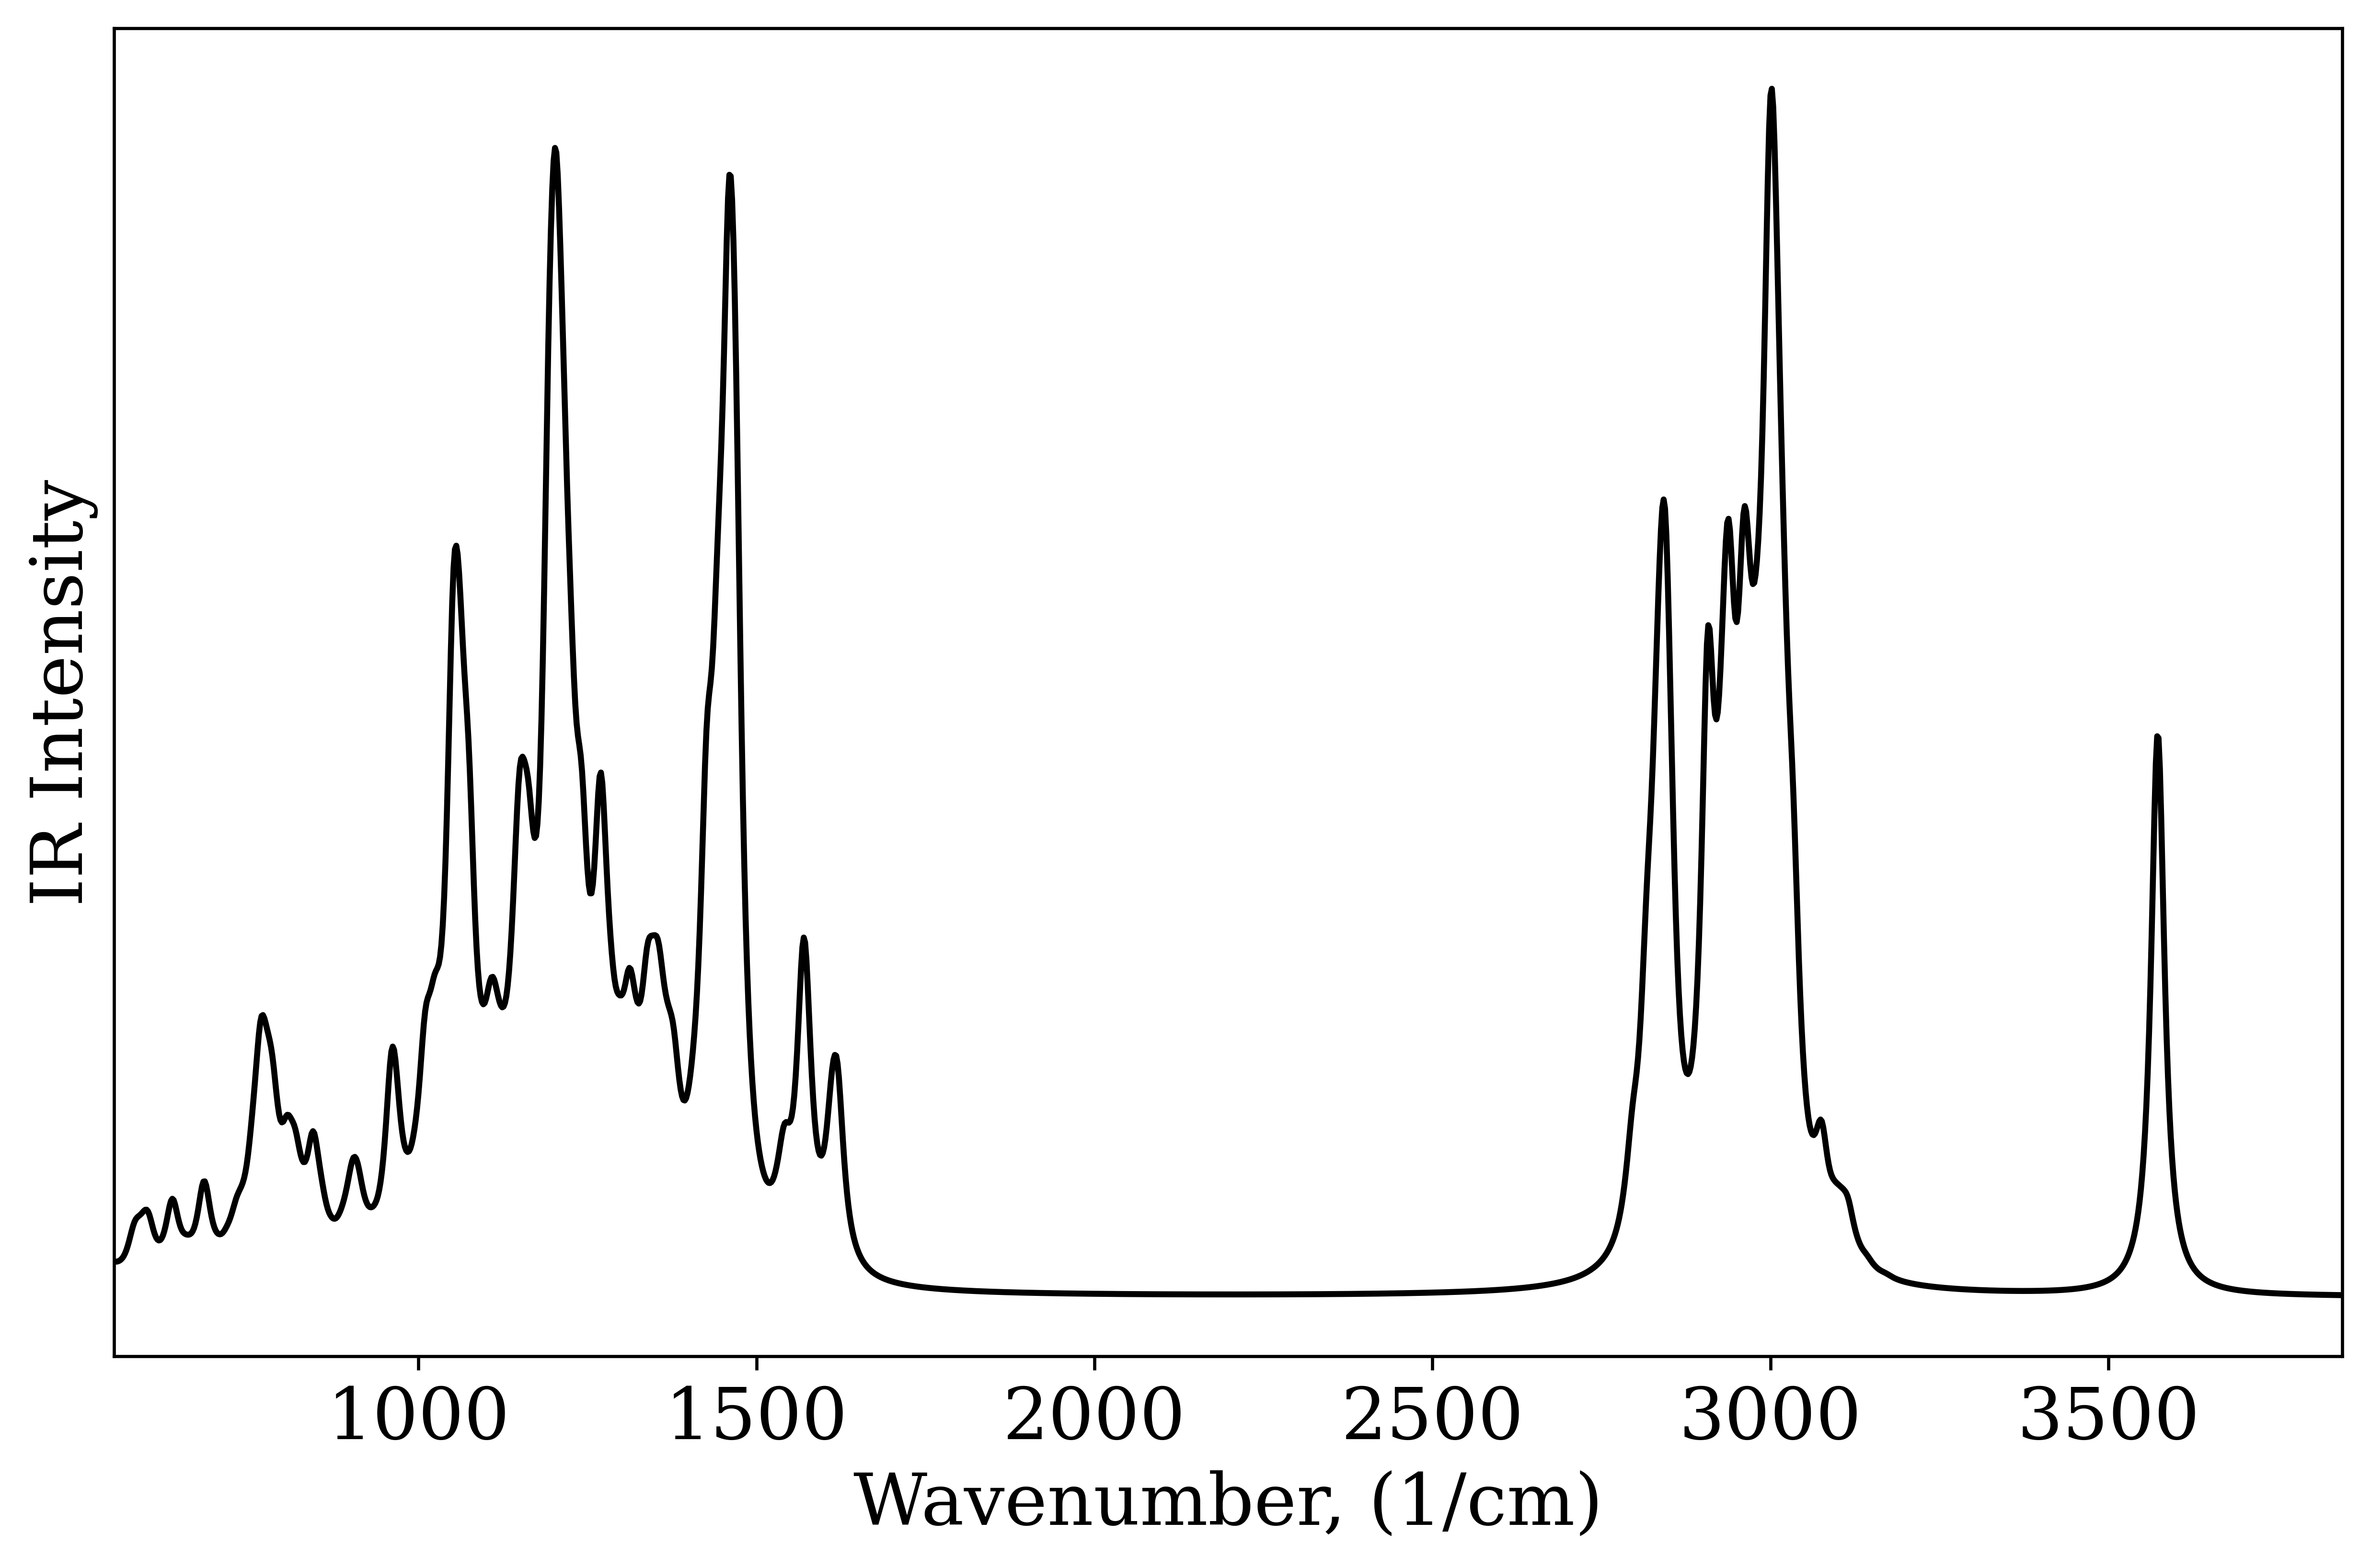

In [236]:
fig = plt.figure(figsize=(10, 6), dpi=600)
plt.rc('font', family='serif', size = 18)
plt.plot(x,weighted_IR,'k',label='Experimental Gas IR')
plt.xlim(550,3846)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,labelleft=False)
#plt.legend()
#legend = plt.legend(loc='upper center', shadow=True, fontsize=14)
plt.xlabel('Wavenumber, (1/cm)')
plt.ylabel('IR Intensity')
plt.show()
#fig.savefig(path+compound+output+" IR DFT spectra in comparison with the experimental spectrum.png", bbox_inches='tight')

### Create dataset with weighted total IR

In [238]:
compounds

0             Heroin
1           Morphine
2      Acetylcodeine
3            Codeine
4        Hydrocodone
           ...      
122             DiPT
123        4-HO-DiPT
124         4-HO-MET
125        5-MeO-AMT
126       5-MeO-MiPT
Name: Name, Length: 127, dtype: object

In [248]:
df_new = pd.DataFrame(columns=[['Drug','Class']+feature])
df_new

def compile_tota_IR_data(): 
    index = 0
    for i in range(len(compounds)):
        row = []
        filename = path+compounds[i]+'/'+compounds[i]+" 0.971 scaled DFT 6311++G(d,p) conformer weighted total IR.csv"
        file = pd.read_csv(filename)
        df_row = np.transpose(file)
        
        row.append(compounds[i])
        row.append(Class[i])
        row.extend(df_row.iloc[1,:].tolist())
        df_new.loc[index,:] = row
        print('index:',index)
        index = index+1
    return df_new

In [249]:
df_total_IR = compile_tota_IR_data()

index: 0
index: 1
index: 2
index: 3
index: 4
index: 5
index: 6
index: 7
index: 8
index: 9
index: 10
index: 11
index: 12
index: 13
index: 14
index: 15
index: 16
index: 17
index: 18
index: 19
index: 20
index: 21
index: 22
index: 23
index: 24
index: 25
index: 26
index: 27
index: 28
index: 29
index: 30
index: 31
index: 32
index: 33
index: 34
index: 35
index: 36
index: 37
index: 38
index: 39
index: 40
index: 41
index: 42
index: 43
index: 44
index: 45
index: 46
index: 47
index: 48
index: 49
index: 50
index: 51
index: 52
index: 53
index: 54
index: 55
index: 56
index: 57
index: 58
index: 59
index: 60
index: 61
index: 62
index: 63
index: 64
index: 65
index: 66
index: 67
index: 68
index: 69
index: 70
index: 71
index: 72
index: 73
index: 74
index: 75
index: 76
index: 77
index: 78
index: 79
index: 80
index: 81
index: 82
index: 83
index: 84
index: 85
index: 86
index: 87
index: 88
index: 89
index: 90
index: 91
index: 92
index: 93
index: 94
index: 95
index: 96
index: 97
index: 98
index: 99
index: 100

In [252]:
output_path = '/Users/hek/Research/Cheminformatics/Project_3_ML for Raman data/ML results/'
df_total_IR.to_csv(output_path+"0.971 scaled DFT 6-311++G(d,p) conformer weighted total IR - Unique compounds.csv",index=False)